In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
data=pd.read_csv("train.csv")

In [20]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [21]:
data.shape

(9800, 18)

In [22]:
data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [23]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [25]:
df=data.drop(["Row ID","Order ID","Customer ID","Product ID"],axis=1)

In [26]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [27]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [28]:
df[df["Postal Code"].isnull()]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
2234,05/12/2018,10/12/2018,Standard Class,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,07/11/2016,09/11/2016,Second Class,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,06/04/2017,10/04/2017,Standard Class,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Office Supplies,Art,4009 Highlighters,8.04
9148,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Paper,Xerox 191,79.92
9387,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Paper,Xerox 1881,12.28
9388,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [29]:
df["Postal Code"]=df["Postal Code"].fillna(5402)

In [30]:
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880
9798,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [31]:
df.isnull().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [33]:
df[df["City"]=="Burlington"]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
683,04/11/2018,04/11/2018,Same Day,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980
684,04/11/2018,04/11/2018,Same Day,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,167.440
1008,26/12/2018,01/01/2019,Standard Class,Patrick O'Brill,Consumer,United States,Burlington,Iowa,52601.0,Central,Office Supplies,Paper,"Recycled Desk Saver Line ""While You Were Out"" ...",44.750
1038,20/11/2018,21/11/2018,First Class,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Art,Newell 336,23.968
1039,20/11/2018,21/11/2018,First Class,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Art,Staples in misc. colors,28.728
1393,03/07/2018,04/07/2018,First Class,Yana Sorensen,Corporate,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Art,4009 Highlighters by Sanford,9.552
2234,05/12/2018,10/12/2018,Standard Class,Quincy Jones,Corporate,United States,Burlington,Vermont,5402.0,East,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.030
2928,19/10/2018,26/10/2018,Standard Class,Tracy Hopkins,Home Office,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1633.188
5065,30/11/2018,07/12/2018,Standard Class,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,Technology,Accessories,Logitech Wireless Gaming Headset G930,383.976
5066,30/11/2018,07/12/2018,Standard Class,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,1781.682


In [34]:
#Creating a column named Month

df["Month"]=df["Order Date"].str[3:5] 
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,06
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,05
9796,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,01
9797,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,01
9798,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,01


In [35]:
df["Month"]=df["Month"].astype("int32")
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,5
9796,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,1
9797,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,1
9798,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,1


In [36]:
#Translate month names into words
d={1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

In [42]:
d

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

In [37]:
d[4]

'April'

In [38]:
df["Month"]=[d[i] for i in df["Month"]]
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,November
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,November
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,June
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,October
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,May
9796,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,January
9797,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,January
9798,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,January


In [59]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d-%m-%Y")

In [60]:
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,2017-11-08,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,November
1,2017-11-08,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,November
2,2017-06-12,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,June
3,2016-10-11,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,October
4,2016-10-11,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,May
9796,2016-01-12,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,January
9797,2016-01-12,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,January
9798,2016-01-12,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,January


In [66]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="%d/%m/%Y")

In [67]:
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,2017-11-08,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,November
1,2017-11-08,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,November
2,2017-06-12,2017-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,June
3,2016-10-11,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,October
4,2016-10-11,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,2017-05-28,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,May
9796,2016-01-12,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,January
9797,2016-01-12,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,January
9798,2016-01-12,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,January


In [68]:
df["Year"]=df["Order Date"].dt.year
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month,Year
0,2017-11-08,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,November,2017
1,2017-11-08,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,November,2017
2,2017-06-12,2017-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,June,2017
3,2016-10-11,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,October,2016
4,2016-10-11,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,October,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,2017-05-28,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,May,2017
9796,2016-01-12,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,January,2016
9797,2016-01-12,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,January,2016
9798,2016-01-12,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,January,2016


In [69]:
df["Year"].value_counts()

Year
2018    3258
2017    2534
2016    2055
2015    1953
Name: count, dtype: int64

In [70]:
df["Month"].value_counts()

Month
November     1449
December     1382
September    1354
October       809
May           725
July          697
August        693
June          691
March         680
April         657
January       366
February      297
Name: count, dtype: int64

In [89]:
#Which month has the most sales?
months_df = df.groupby("Month", as_index=True).sum(numeric_only=True)
months_df

,Postal Code,Sales,Year
Month,,,
April,34472176.0,136283.0006,1324950
August,39887477.0,157315.9270,1397545
December,79735933.0,321480.1695,2787094
February,16533469.0,59371.1154,598997
January,20406756.0,94291.6296,738154
July,38081551.0,145535.6890,1405652
June,37001159.0,145837.5233,1393591
March,37422279.0,197573.5872,1371361
May,39303261.0,154086.7237,1462180


In [103]:
#Sales amount by month
months_df=months_df[["Sales"]]
months_df

,Sales
0,136283.0006
1,157315.9270
2,321480.1695
3,59371.1154
4,94291.6296
5,145535.6890
6,145837.5233
7,197573.5872
8,154086.7237
9,350161.7110


In [104]:
months_df.reset_index(inplace=True)
months_df

,index,Sales
0,0,136283.0006
1,1,157315.9270
2,2,321480.1695
3,3,59371.1154
4,4,94291.6296
5,5,145535.6890
6,6,145837.5233
7,7,197573.5872
8,8,154086.7237
9,9,350161.7110


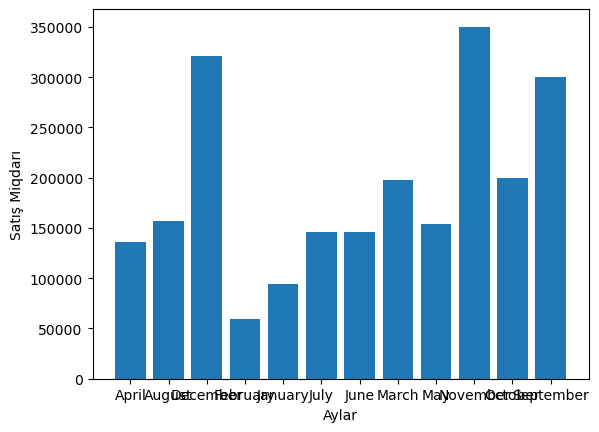

In [99]:
plt.bar(months_df["Month"],months_df["Sales"])
plt.xlabel("Aylar")
plt.ylabel("Satış Miqdarı")
plt.show()

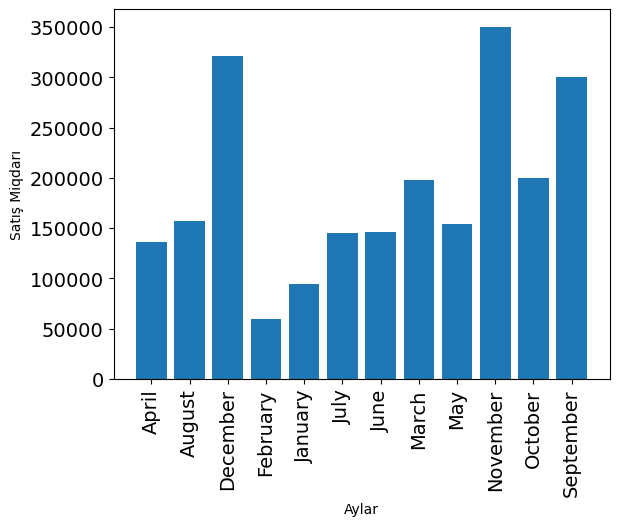

In [102]:
plt.bar(months_df["Month"],months_df["Sales"])
plt.xlabel("Aylar")
plt.ylabel("Satış Miqdarı")
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

In [109]:
year_df = df.groupby("Year", as_index=True).sum(numeric_only=True)
year_df = year_df[["Sales"]]
year_df

,Sales
Year,
2015,479856.2081
2016,459436.0054
2017,600192.5500
2018,722052.0192


In [114]:
year_df.reset_index(inplace=True)
year_df

,Year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


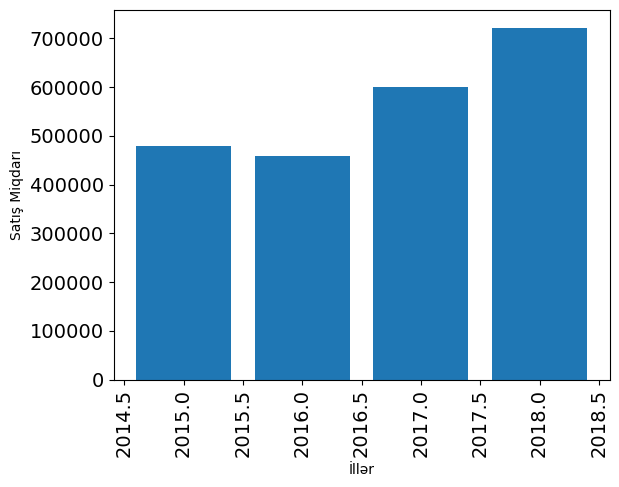

In [134]:
plt.bar(year_df["Year"],year_df["Sales"])
plt.xlabel("İllər")
plt.ylabel("Satış Miqdarı")
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

In [122]:
Customer = df.groupby("Customer Name", as_index=True).sum(numeric_only=True).sort_values("Sales", ascending=False)
Customer.drop(["Postal Code","Year"], axis=1, inplace=True)
Customer

,Sales
Customer Name,
Sean Miller,25043.050
Tamara Chand,19052.218
Raymond Buch,15117.339
Tom Ashbrook,14595.620
Adrian Barton,14473.571
...,...
Mitch Gastineau,16.739
Carl Jackson,16.520
Sung Chung,14.112


In [155]:
Customer.reset_index(inplace=True)
Customer

,Customer Name,Sales
0,Sean Miller,25043.050
1,Tamara Chand,19052.218
2,Raymond Buch,15117.339
3,Tom Ashbrook,14595.620
4,Adrian Barton,14473.571
5,Ken Lonsdale,14175.229
6,Sanjit Chand,14142.334
7,Hunter Lopez,12873.298
8,Sanjit Engle,12209.438
9,Christopher Conant,12129.072


In [156]:
Customer=Customer.head(20)

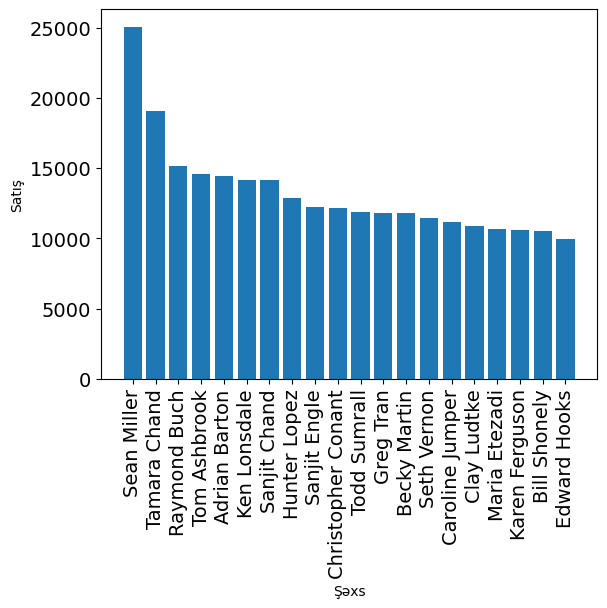

In [157]:
plt.bar(Customer["Customer Name"], Customer["Sales"])
plt.xlabel("Şəxs")
plt.ylabel("Satış")
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()


In [158]:
category = df.groupby("Category", as_index=True).sum(numeric_only=True)
category

,Postal Code,Sales,Year
Category,,,
Furniture,115548447.0,728658.5757,4190735
Office Supplies,324887447.0,705422.3340,11916829
Technology,100694081.0,827455.8730,3656333


In [161]:
category = df.groupby("Category", as_index=True).sum(numeric_only=True)
category.drop(["Postal Code", "Year"], axis=1, inplace=True)
category

,Sales
Category,
Furniture,728658.5757
Office Supplies,705422.3340
Technology,827455.8730


In [162]:
category.reset_index(inplace=True)
category

,Category,Sales
0,Furniture,728658.5757
1,Office Supplies,705422.3340
2,Technology,827455.8730


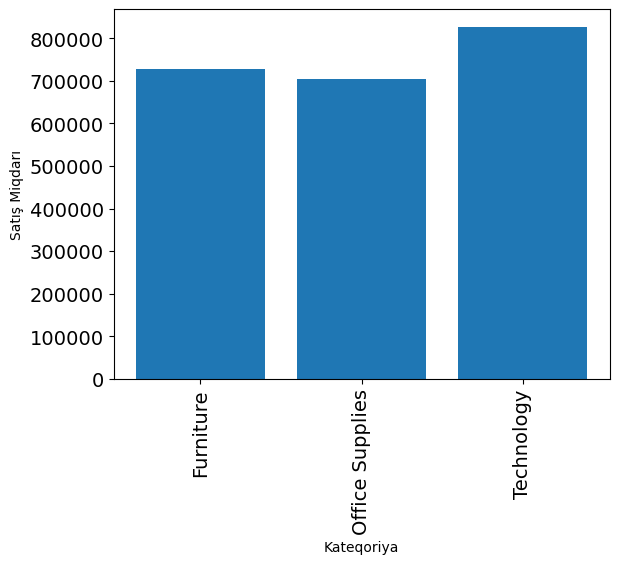

In [163]:
plt.bar(category["Category"],category["Sales"])
plt.xlabel("Kateqoriya")
plt.ylabel("Satış Miqdarı")
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

([<matplotlib.patches.Wedge at 0x243a95e94d0>,
 [Text(0.5829874054700103, 0.932805277141669, 'Furniture'),
  Text(-1.089656596317848, 0.1504941929145523, 'Office Supplies'),
  Text(0.4498857223734124, -1.003794220348251, 'Technology')],
 [Text(0.31799313025636916, 0.5088028784409103, '32.22%'),
  Text(-0.5943581434460988, 0.08208774158975578, '31.19%'),
  Text(0.24539221220367946, -0.547524120189955, '36.59%')])

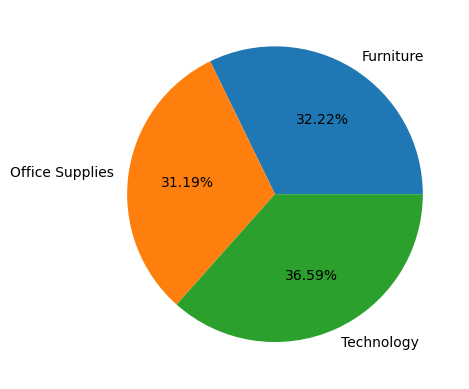

In [170]:
plt.pie(category["Sales"],labels=category["Category"],autopct="%0.2f%%")

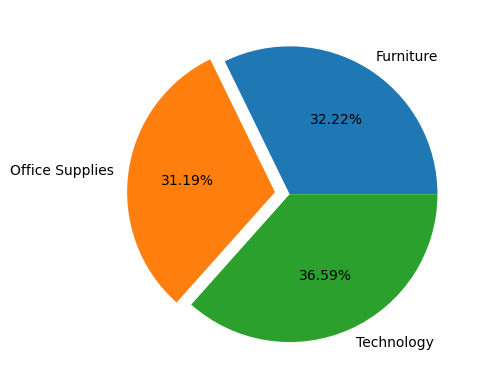

In [172]:
plt.pie(category["Sales"],labels=category["Category"],autopct="%0.2f%%", explode=[0,0.1,0])
plt.show()